## 環境設定

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [58]:
# Install HappyML Library
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

In [59]:
# Load Database
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

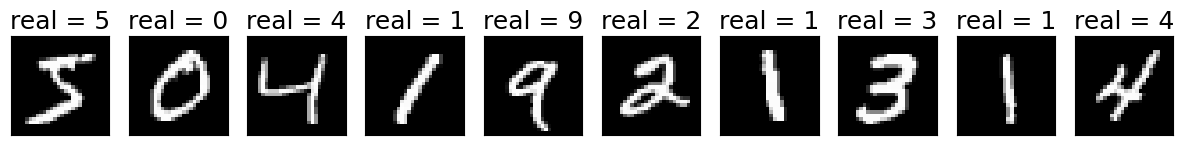

In [60]:
# Verify Data Loaded
import HappyML.model_drawer as md

md.show_first_n_images(x_ary=X_train, y_real=Y_train, first_n=10)

## 前處理

In [61]:
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0

## 模型建立、訓練

In [62]:
#CNN 模型
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [63]:
model.fit(X_train, Y_train, validation_split=0.2, batch_size=10, epochs=5)

Epoch 1/5
4800/4800 [==============================] - 19s 4ms/step - loss: 0.1717 - accuracy: 0.9477 - val_loss: 0.0737 - val_accuracy: 0.9791
Epoch 2/5
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.0574 - val_accuracy: 0.9830
Epoch 3/5
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0553 - val_accuracy: 0.9839
Epoch 4/5
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0550 - val_accuracy: 0.9850
Epoch 5/5
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0510 - val_accuracy: 0.9870


##評估模型

In [65]:
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9857
Test Accuracy: 98.57%


In [75]:
X_test = X_test.reshape((10000, 28, 28, 1))

313/313 [==============================] - 1s 2ms/step


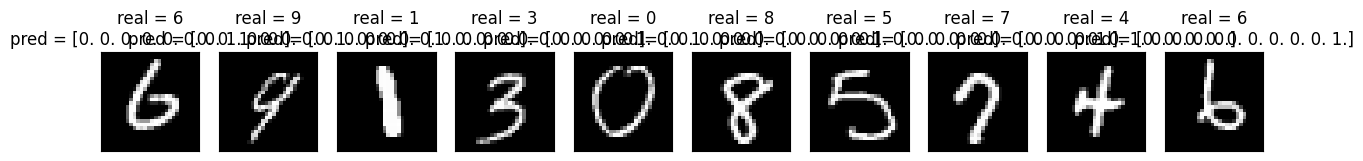

In [79]:
Y_pred = np.rint(model.predict(X_test))

for data, label in test_set:
    md.show_first_n_images(x_ary=data, y_real=label, y_pred=Y_pred[:10], first_n=10, font_size=12)
    break

In [ ]:
md.show_first_n_images(x_ary=X_train, y_real=Y_train, first_n=10)